In [33]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score



To show top 5 entries of dataset



In [34]:
df = pd.read_csv("covid_19_dataset_50_entries.csv")

df.head()


,Date,Confirmed,Recovered,Deaths,Tests_Conducted
0,01-01-2020,167.0,98.0,70.0,369
1,02-01-2020,297.0,303.0,9.0,832
2,03-01-2020,765.0,68.0,63.0,1725
3,04-01-2020,120.0,283.0,90.0,490
4,05-01-2020,802.0,567.0,67.0,1008


To show general information about dataset

In [35]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             45 non-null     object 
 1   Confirmed        45 non-null     float64
 2   Recovered        43 non-null     float64
 3   Deaths           43 non-null     float64
 4   Tests_Conducted  45 non-null     int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 1.9+ KB


Handling Nan values

In [36]:
df["Confirmed"] = df["Confirmed"].fillna(df["Confirmed"].mean())
df["Recovered"] = df["Recovered"].fillna(df["Recovered"].mean())
df["Deaths"] = df["Deaths"].fillna(df["Deaths"].mean())




To sumup number of duplicates

In [38]:

print(df.duplicated().sum())


0


To drop duplicate entires

In [39]:
df = df.drop_duplicates()


For staticial analysis of data set

In [40]:
df.describe()


,Confirmed,Recovered,Deaths,Tests_Conducted
count,45.000000,45.000000,45.000000,45.000000
mean,608.302326,503.767442,56.046512,1123.355556
std,317.868936,254.425184,32.548533,392.511676
min,106.000000,66.000000,5.000000,369.000000
25%,331.000000,303.000000,27.000000,862.000000
50%,608.302326,507.000000,56.046512,1094.000000
75%,800.000000,617.000000,75.000000,1430.000000
max,1378.000000,1137.000000,143.000000,1822.000000


To sumup number of null values

In [23]:
df.isnull().sum()


,0
Date,0
Confirmed,0
Recovered,0
Deaths,0


boxplot

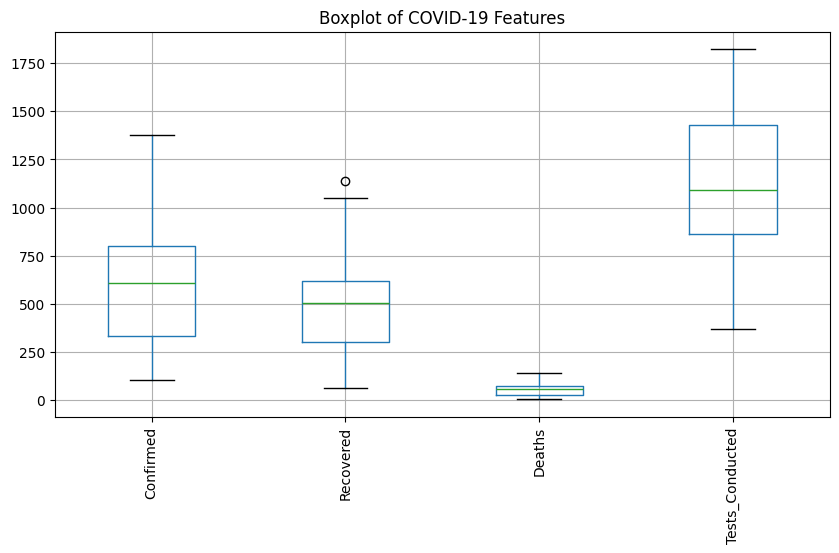

In [41]:
plt.figure(figsize=(10,5))
df.boxplot()
plt.xticks(rotation=90)
plt.title("Boxplot of COVID-19 Features")
plt.show()


Histrogram

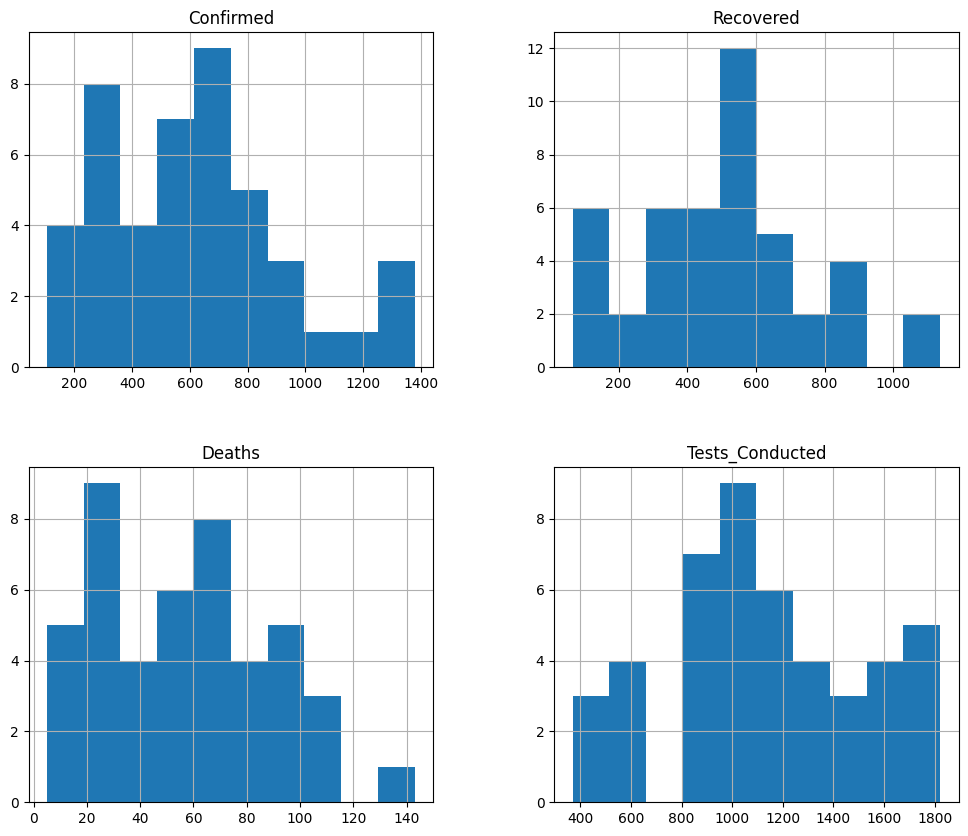

In [42]:
df.hist(figsize=(12,10))
plt.show()


heatmap

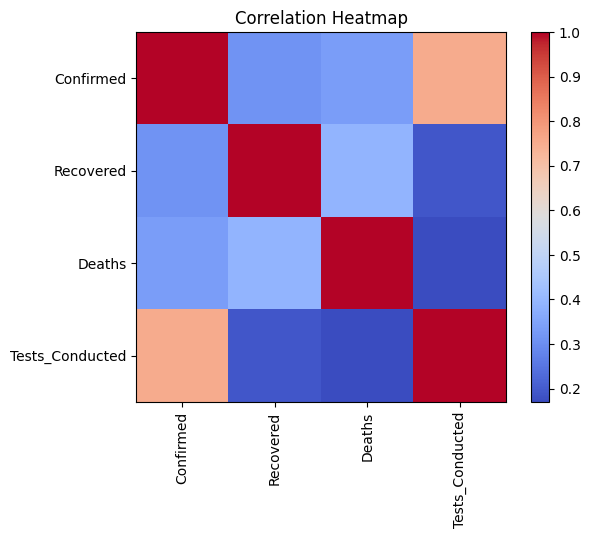

In [43]:
corr = df.select_dtypes(include=['number']).corr()

plt.imshow(corr, cmap='coolwarm')
plt.colorbar()

plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

plt.title("Correlation Heatmap")
plt.show()


In [44]:
print(df.columns)


Index(['Date', 'Confirmed', 'Recovered', 'Deaths', 'Tests_Conducted'], dtype='object')


In [46]:
X = df[['Tests_Conducted']]
y = df['Confirmed']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

slr = LinearRegression()
slr.fit(X_train, y_train)

y_pred = slr.predict(X_test)


In [49]:
poly1 = PolynomialFeatures(degree=1)
X_train_poly1 = poly1.fit_transform(X_train)
X_test_poly1 = poly1.transform(X_test)

model1 = LinearRegression()
model1.fit(X_train_poly1, y_train)

y_pred1 = model1.predict(X_test_poly1)

print("Underfitting R2 Score:", r2_score(y_test, y_pred1))


Underfitting R2 Score: 0.40587347390108375


In [50]:
poly2 = PolynomialFeatures(degree=2)
X_train_poly2 = poly2.fit_transform(X_train)
X_test_poly2 = poly2.transform(X_test)

model2 = LinearRegression()
model2.fit(X_train_poly2, y_train)

y_pred2 = model2.predict(X_test_poly2)

print("Good Fit R2 Score:", r2_score(y_test, y_pred2))


Good Fit R2 Score: 0.4028409497261698


In [51]:
poly10 = PolynomialFeatures(degree=8)
X_train_poly10 = poly10.fit_transform(X_train)
X_test_poly10 = poly10.transform(X_test)

model10 = LinearRegression()
model10.fit(X_train_poly10, y_train)

y_pred10 = model10.predict(X_test_poly10)

print("Overfitting R2 Score:", r2_score(y_test, y_pred10))


Overfitting R2 Score: 0.42577204862987084


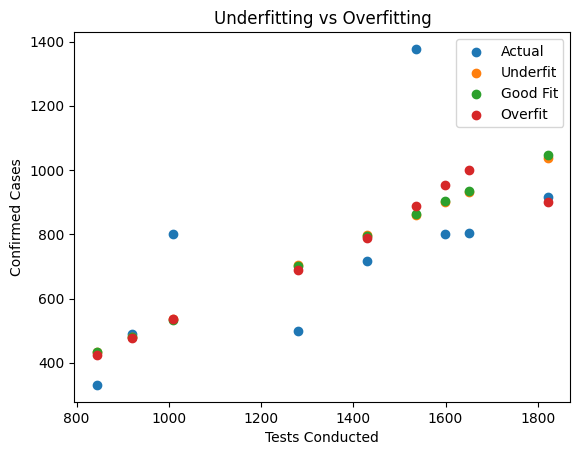

In [52]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred1)
plt.scatter(X_test, y_pred2)
plt.scatter(X_test, y_pred10)

plt.legend(["Actual","Underfit","Good Fit","Overfit"])
plt.xlabel("Tests Conducted")
plt.ylabel("Confirmed Cases")
plt.title("Underfitting vs Overfitting")
plt.show()


In [47]:
print("Slope:", slr.coef_[0])
print("Intercept:", slr.intercept_)

print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


Slope: 0.6174425726282002
Intercept: -86.39136166106857
MSE: 48609.05585930894
RMSE: 220.47461499979752
R² Score: 0.40587347390108375


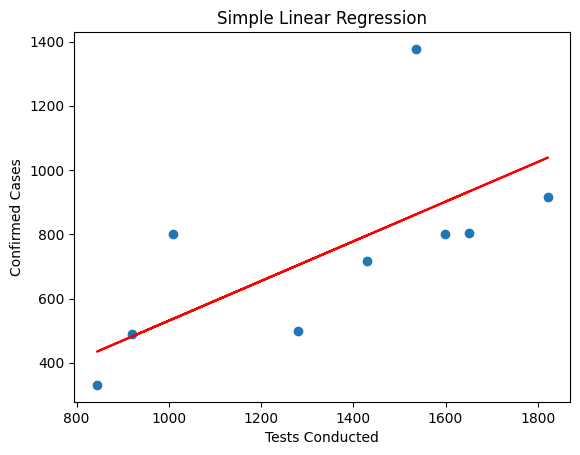

In [48]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.xlabel("Tests Conducted")
plt.ylabel("Confirmed Cases")
plt.title("Simple Linear Regression")
plt.show()